In [1]:
## prepare env, read and prepare data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

codepath = '.././2_code' ## for import of user defined module
datapath = '../../3_data'
from sys import path; path.insert(1, codepath)
from os import chdir; chdir(datapath)

from bfh_cas_pml import prep_data
X_train, X_test, y_train, y_test = prep_data('bank_data_prep.csv', target='y', seed=1234)

In [2]:
from sklearn.ensemble import RandomForestClassifier

100 0.8749619714024947
150 0.8755704289625799
200 0.8755704289625799
250 0.8749619714024947
300 0.8752662001825373
350 0.8773958016428354
400 0.879221174323091
450 0.8773958016428354
best_val   =  400
best_score =  0.879221174323091


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


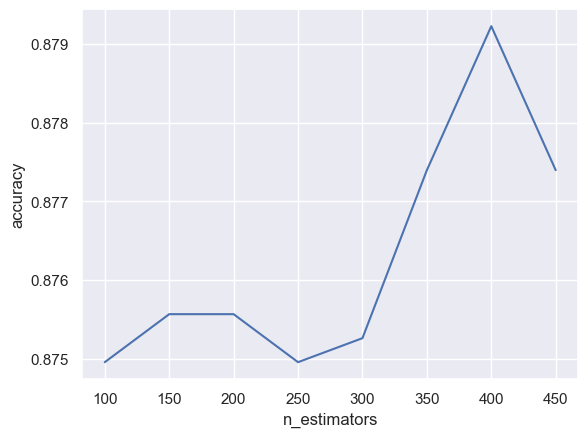

In [3]:
## n_estimators

model = RandomForestClassifier()
scores = []
params = range(100, 500, 50)

for param in params:
    model.set_params(n_estimators=param, random_state=1234)
    model.fit(X_train, y_train) 
    score = model.score(X_test, y_test)
    scores.append(score)
    print(param, score)
    
fig = sns.lineplot(x=params, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy');

print('best_val   = ', params[scores.index(max(scores))])
print('best_score = ', max(scores))

1 0.8573167021600243
2 0.867964709461515
3 0.871006997261941
4 0.8773958016428354
5 0.8749619714024947
6 0.8780042592029206
7 0.8761788865226651
8 0.8773958016428354
9 0.8773958016428354
10 0.8758746577426224
best_val   =  6
best_score =  0.8780042592029206


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


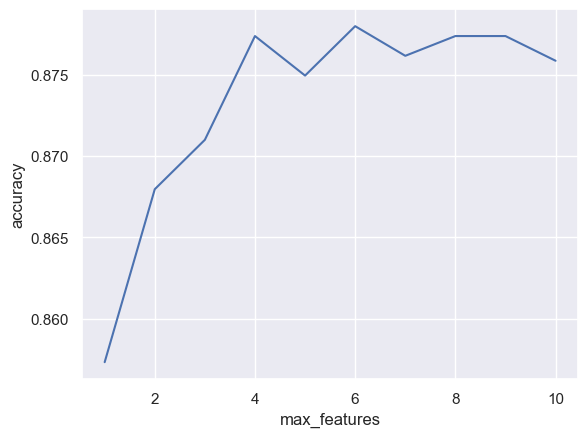

In [4]:
## max_features

model = RandomForestClassifier()
scores = []
params = range(1, 11)

for param in params:
    model.set_params(max_features=param, random_state=1234)
    model.fit(X_train, y_train) 
    score = model.score(X_test, y_test)
    scores.append(score)
    print(param, score)
    
fig = sns.lineplot(x=params, y=scores)
plt.xlabel('max_features')
plt.ylabel('accuracy');

print('best_val   = ', params[scores.index(max(scores))])
print('best_score = ', max(scores))

0.0 0.8749619714024947
2e-05 0.8813507757833892
4e-05 0.8819592333434743
6.000000000000001e-05 0.8786127167630058
8e-05 0.8801338606632187
0.0001 0.8801338606632187
0.00012000000000000002 0.879221174323091
0.00014000000000000001 0.8813507757833892
0.00016 0.880742318223304
0.00018 0.880742318223304
best_val   =  4e-05
best_score =  0.8819592333434743


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


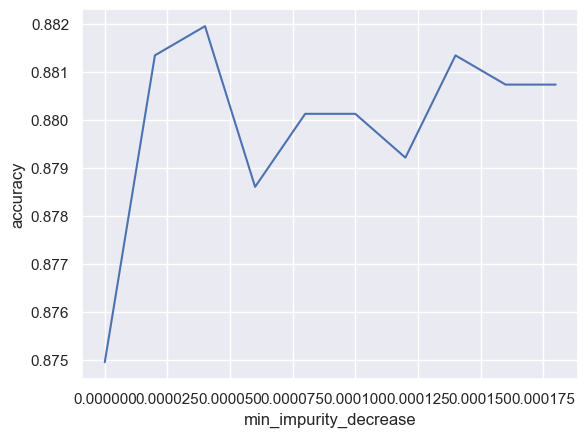

In [5]:
## min_impurity_decrease

model = RandomForestClassifier()
scores = []
params = np.arange(0, 0.0002, 0.00002)

for param in params:
    model.set_params(min_impurity_decrease=param, random_state=1234)
    model.fit(X_train, y_train) 
    score = model.score(X_test, y_test)
    scores.append(score)
    print(param, score)

fig = sns.lineplot(x=params, y=scores)
plt.xlabel('min_impurity_decrease')
plt.ylabel('accuracy');

print('best_val   = ', params[scores.index(max(scores))])
print('best_score = ', max(scores))

**Fazit:**
* n_estimator: Maximum bei 400, allerdings sind auch die Ergebnisse anderer Parameterwerte sehr nahe beieinander
  * Einfluss von random_state? (Rauschen)
* max_features: aufsteigend bis ca. 6, danach ev. Rauschen
* min_impurity_decrease: 0.00004, aber auch hier Einfluss von random_state

keine Tuning Parameter sind hier:
* oob_score
* n_jobs
* random_state
* verbose
* warm_start
* andere?